In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from textblob import TextBlob
from wordcloud import WordCloud
from string import digits
import requests
import pandas as pd
import nltk
import string
import seaborn as sns
import re
nltk.download("stopwords")
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

/Users/tessagervase/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tessagervase/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tessagervase/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [61]:
# load data

los_angeles_df = pd.read_csv('all_reviews_df.csv')
other_cities_df = pd.read_csv('other_cities_reviews.csv')
other_cities_df.rename(columns={"review_text": "text from review"}, inplace = True)

df = pd.concat([los_angeles_df, other_cities_df], ignore_index=True)
df.head()

,id,rating,text from review
0,kbwKxRdvWTu_Hy5sDN-JWQ,5 star rating,Came here yesterday with my wife. Food is amaz...
1,kbwKxRdvWTu_Hy5sDN-JWQ,2 star rating,This review is from when I tried the food last...
2,kbwKxRdvWTu_Hy5sDN-JWQ,5 star rating,One of my favorite spots for food in Westwood....
3,kbwKxRdvWTu_Hy5sDN-JWQ,3 star rating,I knew that since this place had self-order ki...
4,kbwKxRdvWTu_Hy5sDN-JWQ,5 star rating,Delicious and Fast Dim Sum! It was easy to ord...


In [68]:
# replace rating with just the integer rating

for index, row in df.iterrows():
    df.loc[index, 'rating'] = df.loc[index, 'rating'][0]

df.head()

,id,rating,text from review,polarity,tag
0,kbwKxRdvWTu_Hy5sDN-JWQ,5,Came yesterday wife Food amazing staff friendl...,0.502778,Positive
1,kbwKxRdvWTu_Hy5sDN-JWQ,2,This review I tried food last year hopefully i...,0.150877,Positive
2,kbwKxRdvWTu_Hy5sDN-JWQ,5,One favorite spots food Westwood This location...,0.169494,Positive
3,kbwKxRdvWTu_Hy5sDN-JWQ,3,I knew since place selforder kiosks pretty cas...,0.095644,Positive
4,kbwKxRdvWTu_Hy5sDN-JWQ,5,Delicious Fast Dim Sum It easy order kiosk Its...,0.357875,Positive


In [69]:
# remove punctuation

df['text from review'] = df['text from review'].str.replace('[^\w\s]','')
print(df['text from review'])

0       Came yesterday wife Food amazing staff friendl...
1       This review I tried food last year hopefully i...
2       One favorite spots food Westwood This location...
3       I knew since place selforder kiosks pretty cas...
4       Delicious Fast Dim Sum It easy order kiosk Its...
                              ...                        
4325    I love Kagawa Ramen wanted try place They atta...
4326    What A Sweet Spot From kids brought us Kagawa ...
4327    Fresh great quality We found joint Yelp though...
4328    I went try I thought would fun unique I blown ...
4329    Easily one best sushi spots Phoenix The staff ...
Name: text from review, Length: 4330, dtype: object


/var/folders/69/8k9ds_px2833z9tj2lp1n6y80000gn/T/ipykernel_2922/109727898.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text from review'] = df['text from review'].str.replace('[^\w\s]','')


In [70]:
# tokenization

df['text from review'] = df.apply(lambda row: nltk.word_tokenize(row['text from review']), axis=1)

In [71]:
#removing stop words for conciseness

df['text from review'] = df['text from review'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))
print(df.head(20))

                        id rating  \
0   kbwKxRdvWTu_Hy5sDN-JWQ      5   
1   kbwKxRdvWTu_Hy5sDN-JWQ      2   
2   kbwKxRdvWTu_Hy5sDN-JWQ      5   
3   kbwKxRdvWTu_Hy5sDN-JWQ      3   
4   kbwKxRdvWTu_Hy5sDN-JWQ      5   
5   kbwKxRdvWTu_Hy5sDN-JWQ      4   
6   kbwKxRdvWTu_Hy5sDN-JWQ      5   
7   kbwKxRdvWTu_Hy5sDN-JWQ      3   
8   kbwKxRdvWTu_Hy5sDN-JWQ      4   
9   kbwKxRdvWTu_Hy5sDN-JWQ      5   
10  MGZcRMKvabDOK3xdYKxAYQ      5   
11  MGZcRMKvabDOK3xdYKxAYQ      4   
12  MGZcRMKvabDOK3xdYKxAYQ      4   
13  MGZcRMKvabDOK3xdYKxAYQ      4   
14  MGZcRMKvabDOK3xdYKxAYQ      4   
15  MGZcRMKvabDOK3xdYKxAYQ      1   
16  MGZcRMKvabDOK3xdYKxAYQ      3   
17  MGZcRMKvabDOK3xdYKxAYQ      5   
18  MGZcRMKvabDOK3xdYKxAYQ      4   
19  MGZcRMKvabDOK3xdYKxAYQ      5   

                                     text from review  polarity       tag  
0   Came yesterday wife Food amazing staff friendl...  0.502778  Positive  
1   This review I tried food last year hopefully i...  0.150877  Posit

In [72]:
#defining polarity: tag each review as positive, neutral, or negative

def polarity_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None
    
def tag_cal(num):
    if num < 0:
        return 'Negative'
    elif num > 0:
        return 'Positive'
    else:
        return 'Neutral'
        
    
df['polarity'] = df['text from review'].apply(polarity_calc)


df['tag'] = df['polarity'].apply(tag_cal)


print(df)

                          id rating  \
0     kbwKxRdvWTu_Hy5sDN-JWQ      5   
1     kbwKxRdvWTu_Hy5sDN-JWQ      2   
2     kbwKxRdvWTu_Hy5sDN-JWQ      5   
3     kbwKxRdvWTu_Hy5sDN-JWQ      3   
4     kbwKxRdvWTu_Hy5sDN-JWQ      5   
...                      ...    ...   
4325  XRE8PgaxgJm5qiIqD_7eBQ      4   
4326  XRE8PgaxgJm5qiIqD_7eBQ      5   
4327  XRE8PgaxgJm5qiIqD_7eBQ      4   
4328  XRE8PgaxgJm5qiIqD_7eBQ      5   
4329  XRE8PgaxgJm5qiIqD_7eBQ      5   

                                       text from review  polarity       tag  
0     Came yesterday wife Food amazing staff friendl...  0.502778  Positive  
1     This review I tried food last year hopefully i...  0.150877  Positive  
2     One favorite spots food Westwood This location...  0.169494  Positive  
3     I knew since place selforder kiosks pretty cas...  0.095644  Positive  
4     Delicious Fast Dim Sum It easy order kiosk Its...  0.357875  Positive  
...                                                 ...       .

In [73]:
# check analysis results with original ratings

df2 = df[['rating', 'tag']]
df2.groupby('rating').value_counts(normalize = True)

rating  tag     
1       Negative    0.505263
        Positive    0.410526
        Neutral     0.084211
2       Positive    0.664122
        Negative    0.320611
        Neutral     0.015267
3       Positive    0.902507
        Negative    0.091922
        Neutral     0.005571
4       Positive    0.969753
        Negative    0.027498
        Neutral     0.002750
5       Positive    0.986059
        Negative    0.009043
        Neutral     0.004898
dtype: float64

Tag seems positively skewed -- going to change center for neutrality

In [74]:
# redefine tagging system to reduce skewness

def tag_cal_2(num):
    if num < .2:
        return 'Negative'
    elif num > .2:
        return 'Positive'
    else:
        return 'Neutral'
        
    
df['polarity'] = df['text from review'].apply(polarity_calc)


df['tag'] = df['polarity'].apply(tag_cal_2)


print(df)

                          id rating  \
0     kbwKxRdvWTu_Hy5sDN-JWQ      5   
1     kbwKxRdvWTu_Hy5sDN-JWQ      2   
2     kbwKxRdvWTu_Hy5sDN-JWQ      5   
3     kbwKxRdvWTu_Hy5sDN-JWQ      3   
4     kbwKxRdvWTu_Hy5sDN-JWQ      5   
...                      ...    ...   
4325  XRE8PgaxgJm5qiIqD_7eBQ      4   
4326  XRE8PgaxgJm5qiIqD_7eBQ      5   
4327  XRE8PgaxgJm5qiIqD_7eBQ      4   
4328  XRE8PgaxgJm5qiIqD_7eBQ      5   
4329  XRE8PgaxgJm5qiIqD_7eBQ      5   

                                       text from review  polarity       tag  
0     Came yesterday wife Food amazing staff friendl...  0.502778  Positive  
1     This review I tried food last year hopefully i...  0.150877  Negative  
2     One favorite spots food Westwood This location...  0.169494  Negative  
3     I knew since place selforder kiosks pretty cas...  0.095644  Negative  
4     Delicious Fast Dim Sum It easy order kiosk Its...  0.357875  Positive  
...                                                 ...       .

In [75]:
# recheck analysis results with original ratings

df2 = df[['rating', 'tag']]
df2.groupby('rating').value_counts(normalize = True)

rating  tag     
1       Negative    0.926316
        Positive    0.063158
        Neutral     0.010526
2       Negative    0.740458
        Positive    0.259542
3       Negative    0.576602
        Positive    0.423398
4       Positive    0.659945
        Negative    0.340055
5       Positive    0.810852
        Negative    0.187265
        Neutral     0.001884
dtype: float64

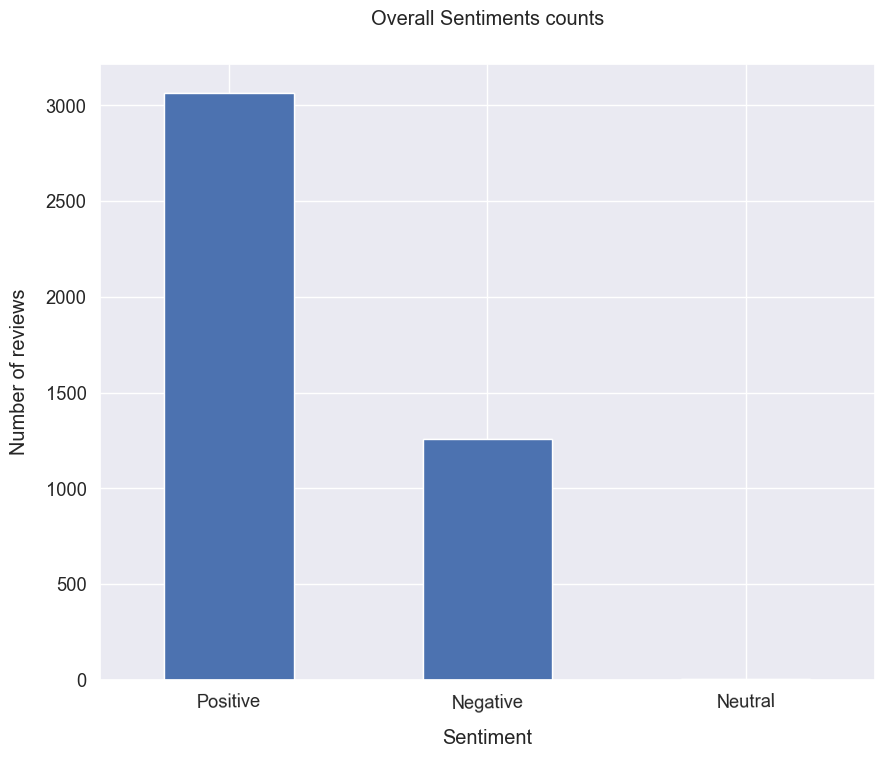

In [76]:
df['tag'].value_counts().plot(kind='bar')
sns.set(font_scale=1.2)
df['tag'].value_counts().plot(kind='bar', figsize=(10, 8), rot=1)
plt.xlabel("Sentiment", labelpad=12)
plt.ylabel("Number of reviews", labelpad=12)
plt.title("Overall Sentiments counts", y=1.05);

<Axes: >

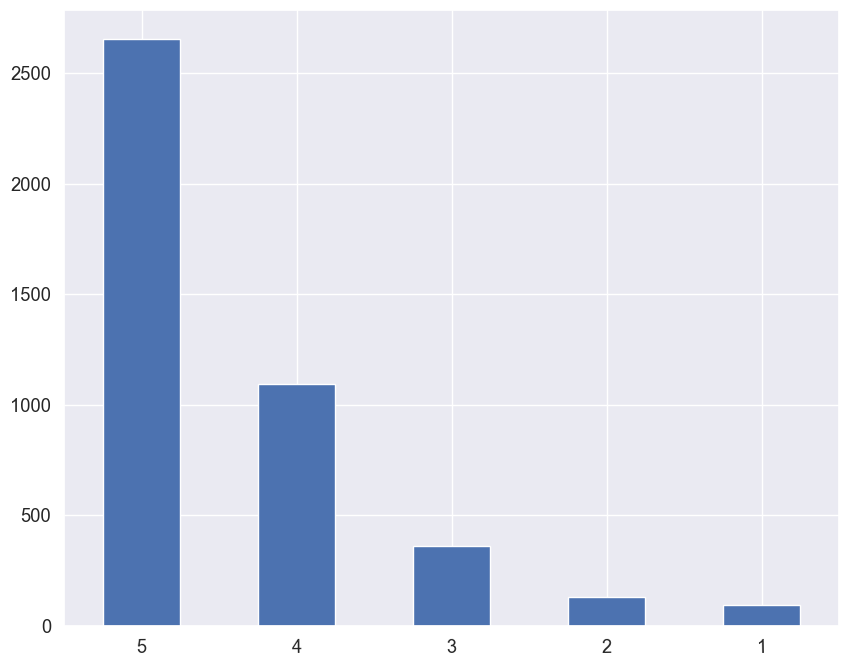

In [77]:
# look at initial distribution of ratings

df['rating'].value_counts().plot(kind='bar', figsize=(10, 8), rot=1)

In [78]:
# save df

df.to_csv('df_with_tags.csv', index = False)